In [1]:
using QuantumStates
using UnitsToValue

Precompiling QuantumStates
        Info Given QuantumStates was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? QuantumStates
[ Info: Precompiling QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f].


In [8]:
# Define the operator for the Hamiltonian
H_operator = :(
    T * DiagonalOperator +
    B_Σ * Rotation_Σ +
    B_Δ * Rotation_Δ +
    A_v * SpinOrbit + 
    q_e * (ΛDoubling_q + 2ΛDoubling_p2q) +
    p_e * ΛDoubling_p2q +
    q_v * ℓDoubling + 
    ϵω2 * (RennerTeller/2)
    # b00_A * Hyperfine_IF
    # b00_A * Hyperfine_IL
    # b00_A * (Hyperfine_IF - Hyperfine_IL)
);

In [9]:
# Spectroscopic parameters for the A(010) state from Li & Coxon (1995)
# Note that parameters are converted from cm⁻¹ to Hz
parameters = @params begin
    T = 16360.389 * c * 1e2
    B_Σ = 0.3402123 * c * 1e2
    B_Δ = 0.3402609 * c * 1e2
    A_v = 67.0951 * c * 1e2
    q_e = -0.3072e-3 * c * 1e2
    p_e = -0.04472 * c * 1e2
    q_v = -0.6978e-3 * c * 1e2
    ϵω2 = -36.2634 * c * 1e2
    b00_A = 1e6
end;

In [17]:
# Define bounds for the quantum numbers that define which states to include in the basis
QN_bounds = (
    label = "A",
    v_1 = 0,
    v_2 = 1,
    ℓ = (-1,1),
    v_3 = 0,
    Λ = (-1,1),
    I = 1/2,
    S = 1/2,
    J = 1/2:11/2
    # J = 1/2:5/2
    )
basis = order_basis_by_m(enumerate_states(HundsCaseA_LinearMolecule, QN_bounds))
;

In [18]:
CaOH_A010 = @time Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time full_evaluate!(CaOH_A010)
@time solve!(CaOH_A010)
;

  4.141772 seconds (60.53 M allocations: 2.159 GiB, 23.54% gc time)
  3.598956 seconds (60.53 M allocations: 2.031 GiB, 17.84% gc time)
  0.275938 seconds (15 allocations: 19.259 MiB, 5.58% gc time)


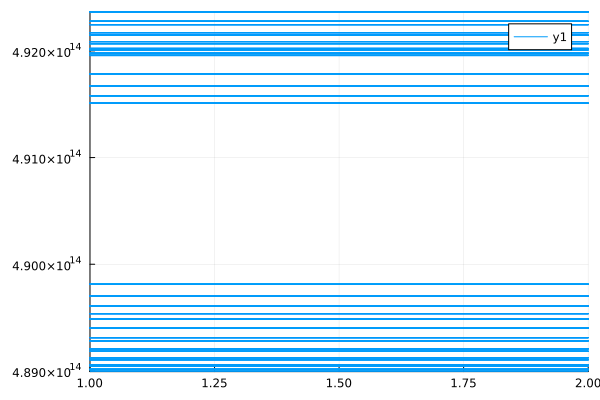

In [19]:
using Plots
hline(energy.(CaOH_A010.states))
# plot!(ylim=(16290, 16425))

In [20]:
@time save_to_file(CaOH_A010, "CaOH_A010", "")

  0.067517 seconds (63.84 k allocations: 1.333 MiB)
